**DEPTH-LIMITED SEARCH**

In [213]:
import matplotlib.pyplot as plt

In [214]:

grid = [
    [1, 0, 0, 0, 1],
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0]
]


In [226]:
# Define initial and goal positions
initial_position = (0,1)
goal_position = (4,4)

In [227]:
# Define problem representation
class Problem:
    def __init__(self, grid, initial, goal):
        self.grid = grid
        self.initial_state = initial
        self.goal_state = goal

    def is_goal(self, state):
        return state == self.goal_state

    def expand(self, state):
        # Define possible movements: up, down, left, right
        movements = [(0, -1), (0, 1), (-1, 0), (1, 0)]
        valid_moves = []
        for move in movements:
            new_x = state[0] + move[0]
            new_y = state[1] + move[1]
            # Check if the new position is within the grid and not an obstacle
            if 0 <= new_x < len(self.grid) and 0 <= new_y < len(self.grid[0]) and self.grid[new_x][new_y] == 0:
                valid_moves.append((new_x, new_y))
        return valid_moves

In [228]:
# DLS algorithm
def depth_limited_search(problem, depth_limit):
    return recursive_dls(problem.initial_state, problem, depth_limit)

def recursive_dls(node, problem, depth_limit):
    if problem.is_goal(node):
        return [node]
    elif depth_limit == 0:
        return "cutoff"
    else:
        for child in problem.expand(node):
            result = recursive_dls(child, problem, depth_limit - 1)
            if result == "cutoff":
                continue
            elif result != "failure":
                return [node] + result
        return "failure"

In [229]:
# Create problem instance
problem = Problem(grid, initial_position, goal_position)

In [230]:
# Find path using DLS with depth limit 10
depth_limit = 10
path = depth_limited_search(problem, depth_limit)
# Output path
if path == "failure":
    print("No path found within the depth limit.")
elif path == "cutoff":
    print("Search terminated due to depth limit.")
else:
    print("Path found:", path)

Path found: [(0, 1), (0, 2), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


In [231]:
# Create problem instance
problem = Problem(grid, initial_position, goal_position)

In [237]:
# Find path using DLS with depth limit 10
depth_limit = 10
path = depth_limited_search(problem, depth_limit)
# Output path
if path == "failure":
    print("No path found within the depth limit.")
elif path == "cutoff":
    print("Search terminated due to depth limit.")
else:
    print("Path found:", path)

Path found: [(0, 1), (0, 2), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


In [241]:
import matplotlib.pyplot as plt

# Visualization code
def visualize_path(grid, path):
    fig, ax = plt.subplots()
    # Create a grid with the same dimensions
    nrows, ncols = len(grid), len(grid[0])
    ax.set_xticks([x - 0.5 for x in range(0, ncols)], minor=True)
    ax.set_yticks([y - 0.5 for y in range(0, nrows)], minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.imshow(grid, cmap='Greys', interpolation='none')
    
    # Highlight the path
    if path:
        for (x, y) in path:
            ax.add_patch(plt.Circle((y, x), radius=0.3, color='blue'))
    
    # Highlight initial and goal positions
    ax.add_patch(plt.Circle((initial_position[0], initial_position[1]), radius=0.3, color='green'))
    ax.add_patch(plt.Circle((goal_position[0], goal_position[1]), radius=0.3, color='red'))
    
    plt.gca().invert_yaxis()
    plt.title("Original Grid with DLS Path")
    plt.show()

In [242]:
 # Visualization of the original grid if no path found
def visualize_grid(grid):
    fig, ax = plt.subplots()
    # Create a grid with the same dimensions
    nrows, ncols = len(grid), len(grid[0])
    ax.set_xticks([x - 0.5 for x in range(1, ncols)], minor=True)
    ax.set_yticks([y - 0.5 for y in range(1, nrows)], minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.imshow(grid, cmap='Greys', interpolation='none')
    
    # Highlight initial and goal positions
    ax.add_patch(plt.Circle((initial_position[0], initial_position[1]), radius=0.3, color='green'))
    ax.add_patch(plt.Circle((goal_position[0], goal_position[1]), radius=0.3, color='red'))
    
    plt.gca().invert_yaxis()
    plt.title("Original Grid")
    plt.show()

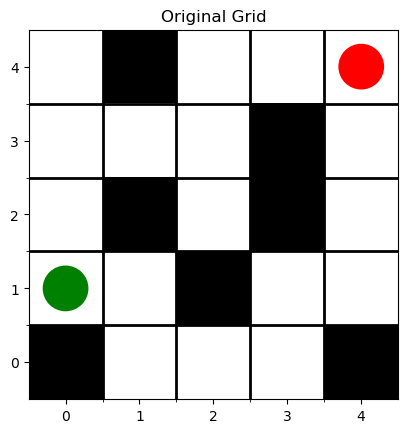

In [243]:
visualize_grid(grid)

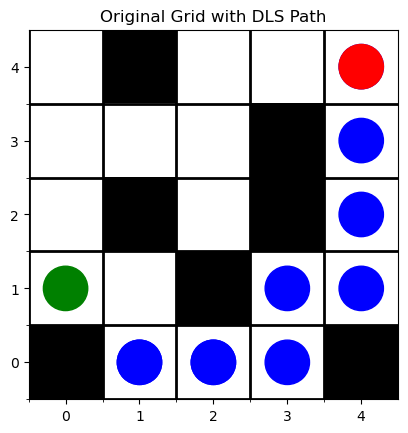

In [244]:
visualize_path(grid, path)